2.1 The data set description

In [ ]:
#1.
import pandas as pd
bankrupt = pd.read_csv("D:/study/A3/ML_lab2/bankrupt.txt" , sep=",")
print(bankrupt)

In [23]:
#2.observations and variables
num_observations, num_variables = bankrupt.shape
print("Number of observations:", num_observations)
print("Number of variables:", num_variables)

Number of observations: 6819
Number of variables: 96


In [24]:
#3.
bankrupt.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder s Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [25]:
#4.Bankrupt number and percentage
target_variable = "Bankrupt?"
bankrupt_counts = bankrupt[target_variable].value_counts()
num_bankrupt = bankrupt_counts[1]
num_not_bankrupt = bankrupt_counts[0]

percentage_bankrupt = (num_bankrupt / num_observations) * 100
percentage_not_bankrupt = (num_not_bankrupt / num_observations) * 100

print("Number of companies that went bankrupt:", num_bankrupt)
print("Number of companies that did not go bankrupt:", num_not_bankrupt)
print("Percentage of companies that went bankrupt:", percentage_bankrupt, "%")

print("Percentage of companies that did not go bankrupt:", percentage_not_bankrupt, "%")


Number of companies that went bankrupt: 220
Number of companies that did not go bankrupt: 6599
Percentage of companies that went bankrupt: 3.2262795131250916 %
Percentage of companies that did not go bankrupt: 96.77372048687491 %


In [26]:
#5.
from sklearn.preprocessing import StandardScaler

# Import the data sets
x_train = pd.read_csv("D:/study/A3/ML_lab2/x_train.csv", index_col=0)
x_test = pd.read_csv("D:/study/A3/ML_lab2/x_test.csv", index_col=0)
y_train = pd.read_csv("D:/study/A3/ML_lab2/y_train.csv", index_col=0)
y_test = pd.read_csv("D:/study/A3/ML_lab2/y_test.csv", index_col=0)

In [27]:
num_observations_train = x_train.shape[0]
num_observations_test = x_test.shape[0]

print("Number of observations in x_train:", num_observations_train)
print("Number of observations in x_test:", num_observations_test)

Number of observations in x_train: 5455
Number of observations in x_test: 1364


In [28]:
class_distribution_train = y_train['Bankrupt'].value_counts()
class_distribution_test = y_test['Bankrupt'].value_counts()

print("Class distribution in y_train:")
print(class_distribution_train)

print("Class distribution in y_test:")
print(class_distribution_test)

Class distribution in y_train:
0    5281
1     174
Name: Bankrupt, dtype: int64
Class distribution in y_test:
0    1318
1      46
Name: Bankrupt, dtype: int64


In [32]:
scaler = StandardScaler()

# Fit and transform the training data
x_train_standardized = scaler.fit_transform(x_train)

# Transform the test data using the same scaler
x_test_standardized = scaler.transform(x_test)

# Create new DataFrames with standardized data
x_train_standardized = pd.DataFrame(x_train_standardized, columns=x_train.columns)
x_test_standardized = pd.DataFrame(x_test_standardized, columns=x_test.columns)

# Verify the lengths of the new DataFrames
assert x_train_standardized.shape == x_train.shape
assert x_test_standardized.shape == x_test.shape


2.2 Logistic regression

In [40]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
#1.
# Merge x_train and y_train dataframes
bankrupt_train = pd.concat([x_train, y_train], axis=1)

# Define the formula for logistic regression
formula = 'Bankrupt ~ ROAC + ROAA + ROAB + TRA + TAGR + DR + WKTA + CTA + CLA + CFOA + CLCA + NITA'

# Fit the logistic regression model
model = smf.glm(formula=formula, data=bankrupt_train, family=sm.families.Binomial())
logreg = model.fit()

In [37]:
print(logreg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Bankrupt   No. Observations:                 5455
Model:                            GLM   Df Residuals:                     5443
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -513.79
Date:                Thu, 12 Oct 2023   Deviance:                       1027.6
Time:                        15:36:22   Pearson chi2:                 4.44e+06
No. Iterations:                    10   Pseudo R-squ. (CS):            0.08988
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0644      3.655      1.659      0.0

In [38]:
#2.
print(logreg.fittedvalues) 

1524    0.018523
2819    0.011718
1957    0.003200
5020    0.000507
4443    0.010251
          ...   
4931    0.035072
3264    0.000354
1653    0.002176
2607    0.001122
2732    0.001647
Length: 5455, dtype: float64


In [41]:
#  Convert these probabilities into classes labels
yhat_logreg_probs = logreg.fittedvalues
yhat = [1 if x > 0.5 else 0 for x in yhat_logreg_probs]

# Compute the confusion matrix and obtain a report of performance metrics
confusion = confusion_matrix(yhat, y_train)
report = classification_report(yhat, y_train, digits=3)

print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

Confusion Matrix:
[[5266  143]
 [  15   31]]
Classification Report:
              precision    recall  f1-score   support

           0      0.997     0.974     0.985      5409
           1      0.178     0.674     0.282        46

    accuracy                          0.971      5455
   macro avg      0.588     0.824     0.634      5455
weighted avg      0.990     0.971     0.979      5455



The model has high accuracy, precision, and recall for the majority class (non-bankrupt), but its performance for the minority class (bankrupt) is relatively lower. It correctly identifies most non-bankrupt cases but has difficulty correctly classifying bankrupt cases. The F1-Score for the bankrupt class is notably lower, indicating a trade-off between precision and recall.

In [42]:
#3.
# Convert probabilities into classes labels and compute confusion matrix  for test set
yhat_test_logreg_probs = logreg.predict(x_test)
yhat_test = [1 if x > 0.5 else 0 for x in yhat_test_logreg_probs]

confusion_test = confusion_matrix(yhat_test, y_test)
report_test = classification_report(yhat_test, y_test, digits=3)

print("Confusion Matrix (Test Set):")
print(confusion_test)
print("Classification Report (Test Set):")
print(report_test)

Confusion Matrix (Test Set):
[[1306   39]
 [  12    7]]
Classification Report (Test Set):
              precision    recall  f1-score   support

           0      0.991     0.971     0.981      1345
           1      0.152     0.368     0.215        19

    accuracy                          0.963      1364
   macro avg      0.572     0.670     0.598      1364
weighted avg      0.979     0.963     0.970      1364



Considering these results of test set, it is clear that overall accuracy (96.3%) can be misleading in this imbalanced dataset. The model achieves high accuracy primarily because it correctly classifies the majority class (non-bankrupt) but performs poorly on the minority class (bankrupt). The low precision and recall for the bankrupt class, as well as the low F1-Score, indicate that the model's performance in identifying bankrupt companies is not satisfactory.

In an imbalanced dataset, it's more appropriate to focus on precision, recall, and the F1-Score, especially for the minority class, as these metrics provide a better assessment of the model's effectiveness in correctly identifying the positive class (bankrupt). Additionally, considering other techniques such as changing the decision threshold, or using different algorithms might be necessary to improve the model's performance in imbalanced scenarios.

2.3 K-Nearest Neighbors

In [71]:
#1.
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import balanced_accuracy_score

In [72]:
# Initialize
best_k = 1 
best_balanced_accuracy = 0
# Calculate the balanced accuracy and choose the best k ranging from 1 to 20
for k in range(1, 21):
    # Create a KNN classifier with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model on the training data
    knn.fit(x_train, np.ravel(y_train))
    
    # Make predictions on the test data
    yhat_knn = knn.predict(x_test)
    
    # Calculate balanced accuracy
    balanced_acc = balanced_accuracy_score(y_test, yhat_knn)
    
    # Check if this K value results in higher balanced accuracy
    if balanced_acc > best_balanced_accuracy:
        best_k = k
        best_balanced_accuracy = balanced_acc

print("Best K value:", best_k)
print("Best Balanced Accuracy:", best_balanced_accuracy)


Best K value: 1
Best Balanced Accuracy: 0.5534571485122386


In [73]:
# Fit a KNN model with the best K and make predictions 
n_neighbors = 1
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(x_train, np.ravel(y_train))
yhat_knn = knn.predict(x_test)

# Calculate performance metrics
confusion_best_knn = confusion_matrix(y_test, yhat_knn)
report_best_knn = classification_report(y_test, yhat_knn, digits=3)

print("Confusion Matrix (Best KNN Model):")
print(confusion_best_knn)
print("Classification Report (Best KNN Model):")
print(report_best_knn)

Confusion Matrix (Best KNN Model):
[[1287   31]
 [  40    6]]
Classification Report (Best KNN Model):
              precision    recall  f1-score   support

           0      0.970     0.976     0.973      1318
           1      0.162     0.130     0.145        46

    accuracy                          0.948      1364
   macro avg      0.566     0.553     0.559      1364
weighted avg      0.943     0.948     0.945      1364



The best KNN model demonstrates reasonably high overall accuracy, but it faces challenges in correctly classifying the minority class (bankrupt). The model's performance for the bankrupt class is not satisfactory, and further improvements may be necessary, such as adjusting the classification threshold, exploring different algorithms like the previous. 

2.4 Discriminant Analysis

1.Interpret the Prior Probabilities and Group Means:

Prior Probabilities (π0 and π1): These represent the probabilities of belonging to each class. In binary classification, π0 is the prior probability of being in class 0 (non-bankrupt), and π1 is the prior probability of being in class 1 (bankrupt). These values are based on the proportions of each class in the training data. They give us an idea of the class distribution.

Group Means: The group means represent the mean values of each predictor variable (features) for each class. In the order they were given, they provide insights into how the predictor variables differ between the two classes. They help identify which predictors have significant differences between the classes.

In [74]:
#2. Calculate the Confusion Matrix and Classification Report for the LDA Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
model_lda = lda.fit(x_train, np.ravel(y_train))
yhat_lda = model_lda.predict(x_test)
print("Prior probabilities:")
print(model_lda.priors_)
print("Group Means:")
print(model_lda.means_)

# Confusion Matrix
confusion_lda = confusion_matrix(y_test, yhat_lda)
print("Confusion Matrix (LDA Model):")
print(confusion_lda)

# Classification Report
report_lda = classification_report(y_test, yhat_lda, digits=3)
print("Classification Report (LDA Model):")
print(report_lda)


Prior probabilities:
[0.96810266 0.03189734]
Group Means:
[[5.07499371e-01 5.61487295e-01 5.56092411e-01 1.17719099e-01
  5.55001102e+09 1.11500340e-01 8.15420501e-01 1.25669967e-01
  8.96077591e-02 5.93879112e-01 3.06814657e-02 8.09838677e-01]
 [4.21282047e-01 4.58457712e-01 4.65005880e-01 3.33512513e-02
  4.96788333e+09 1.85968720e-01 7.49489244e-01 4.96204862e-02
  1.39421993e-01 5.58209193e-01 6.24193244e-02 7.39513902e-01]]
Confusion Matrix (LDA Model):
[[1299   19]
 [  31   15]]
Classification Report (LDA Model):
              precision    recall  f1-score   support

           0      0.977     0.986     0.981      1318
           1      0.441     0.326     0.375        46

    accuracy                          0.963      1364
   macro avg      0.709     0.656     0.678      1364
weighted avg      0.959     0.963     0.961      1364



Specificity (True Negative Rate): 0.986
This indicates that the LDA model correctly identifies 98.6% of the non-bankrupt cases, which is a high specificity.

Sensitivity (Recall): 0.326
The model correctly identifies only 32.6% of the bankrupt cases. This is a low sensitivity, suggesting that the model struggles to identify bankrupt cases.

Precision:
For class 0 (Non-Bankrupt): 0.977
High precision indicates that 97.7% of the instances classified as non-bankrupt are indeed non-bankrupt.
For class 1 (Bankrupt): 0.441
The precision for bankrupt cases is lower, indicating that 44.1% of the instances classified as bankrupt are truly bankrupt.

F1-Score:
For class 0 (Non-Bankrupt): 0.981
The F1-Score for non-bankrupt cases is high, indicating a good balance between precision and recall.

For class 1 (Bankrupt): 0.375
The F1-Score for bankrupt cases is lower, suggesting that the model's performance in identifying bankrupt cases is not strong.
Accuracy: 0.963

The overall accuracy of the LDA model is high (96.3%).

Macro-Averaged F1-Score: 0.678
The macro-average F1-Score takes the average of the F1-Scores for each class. It is relatively high at 0.678, indicating a good overall balance.

Weighted-Averaged F1-Score: 0.961
The weighted-average F1-Score accounts for class imbalances and is high at 0.961. This suggests that the model performs well overall but may struggle with the minority class (bankrupt).

In summary, like the previous, the overall accuracy is high, but it has low sensitivity to classify correctly the minority class (bankrupt).

In [75]:
#3.Calculate the confusion matrix and then classification report on the test set for the QDA classifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
model_qda = qda.fit(x_train, np.ravel(y_train))
yhat_qda = model_qda.predict(x_test)

# Confusion Matrix for QDA
confusion_qda = confusion_matrix(y_test, yhat_qda)
print("Confusion Matrix (QDA Model):")
print(confusion_qda)

# Classification Report for QDA
report_qda = classification_report(y_test, yhat_qda, digits=3)
print("Classification Report (QDA Model):")
print(report_qda)


Confusion Matrix (QDA Model):
[[1280   38]
 [  30   16]]
Classification Report (QDA Model):
              precision    recall  f1-score   support

           0      0.977     0.971     0.974      1318
           1      0.296     0.348     0.320        46

    accuracy                          0.950      1364
   macro avg      0.637     0.659     0.647      1364
weighted avg      0.954     0.950     0.952      1364



Performance is alomost same as LDA

2.5 ROC (Receiver operating characteristic) curve

In [79]:
#1.Interpret the outputs of the roc_curve() function
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# LDA Model
lda_scores = lda.predict_proba(x_test)[:, 1]
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test, lda_scores)
auc_lda = auc(fpr_lda, tpr_lda)

fpr represents the false positive rate at different threshold values.
tpr represents the true positive rate (or recall) at different threshold values.
The thresholds array contains the threshold values at which these rates are calculated.
The ROC curve is essentially a plot of fpr on the x-axis and tpr on the y-axis. It shows how the true positive rate and false positive rate change with different threshold values.

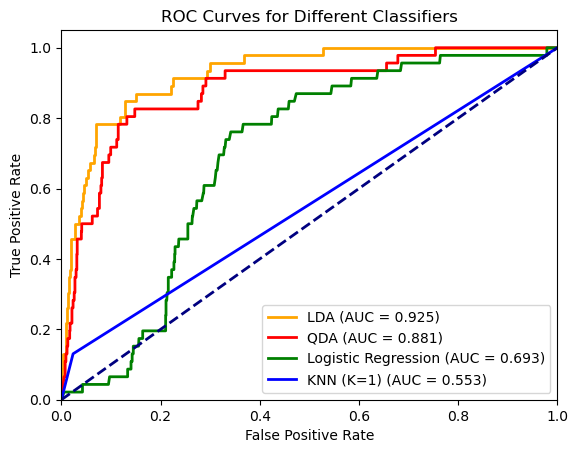

In [93]:
# Calculate the auc for 4 models
# QDA Model
from sklearn.linear_model import LogisticRegression
qda_scores = qda.predict_proba(x_test)[:, 1]
fpr_qda, tpr_qda, thresholds_qda = roc_curve(y_test, qda_scores)
auc_qda = auc(fpr_qda, tpr_qda)

# Logistic Regression Model
model = LogisticRegression()
logreg = model.fit(x_train, np.ravel(y_train))
logreg_scores = logreg.predict_proba(x_test)[:, 1]
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, logreg_scores)
auc_logreg = auc(fpr_logreg, tpr_logreg)

# KNN Model with Chosen K
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, np.ravel(y_train))
knn_scores = knn.predict_proba(x_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_scores)
auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC Curves
plt.figure()
plt.plot(fpr_lda, tpr_lda, color='orange', lw=2, label='LDA (AUC = {:.3f})'.format(auc_lda))
plt.plot(fpr_qda, tpr_qda, color='red', lw=2, label='QDA (AUC = {:.3f})'.format(auc_qda))
plt.plot(fpr_logreg, tpr_logreg, color='green', lw=2, label='Logistic Regression (AUC = {:.3f})'.format(auc_logreg))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='KNN (K={}) (AUC = {:.3f})'.format(best_k, auc_knn))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend(loc="lower right")
plt.show()

LDA (AUC = 0.925): The ROC curve for LDA shows a good balance between true positives and false positives. 

QDA (AUC = 0.881): QDA also shows a reasonable balance. Similar to LDA.

Logistic Regression (AUC = 0.693): Logistic regression appears to have a lower AUC compared to LDA and QDA. The ROC curve suggests that adjusting the threshold can improve its performance on the minority class. We may need to choose a lower threshold to increase sensitivity.

KNN (K=1) (AUC = 0.553): KNN with K=1 has the lowest AUC and is not well-suited for this imbalanced dataset. We would need to adjust the threshold significantly, but it may not be effective in improving model performance.

In [92]:
##Threshold
# For LDA
j_stat_lda = tpr_lda - fpr_lda
optimal_threshold_lda = thresholds_lda[np.argmax(j_stat_lda)]
sensitivity_lda = tpr_lda[np.argmax(j_stat_lda)]
specificity_lda = 1 - fpr_lda[np.argmax(j_stat_lda)]

# For QDA
j_stat_qda = tpr_qda - fpr_qda
optimal_threshold_qda = thresholds_qda[np.argmax(j_stat_qda)]
sensitivity_qda = tpr_qda[np.argmax(j_stat_qda)]
specificity_qda = 1 - fpr_qda[np.argmax(j_stat_qda)]

# For Logistic Regression
j_stat_logreg = tpr_logreg - fpr_logreg
optimal_threshold_logreg = thresholds_logreg[np.argmax(j_stat_logreg)]
sensitivity_logreg = tpr_logreg[np.argmax(j_stat_logreg)]
specificity_logreg = 1 - fpr_logreg[np.argmax(j_stat_logreg)]

# For KNN (K=1)
j_stat_knn = tpr_knn - fpr_knn
optimal_threshold_knn = thresholds_knn[np.argmax(j_stat_knn)]
sensitivity_knn = tpr_knn[np.argmax(j_stat_knn)]
specificity_knn = 1 - fpr_knn[np.argmax(j_stat_knn)]

# Print the optimal thresholds and corresponding sensitivity and specificity for each model
print(f"LDA: Optimal Threshold = {optimal_threshold_lda}, Sensitivity = {sensitivity_lda:.3f}, Specificity = {specificity_lda:.3f}")
print(f"QDA: Optimal Threshold = {optimal_threshold_qda}, Sensitivity = {sensitivity_qda:.3f}, Specificity = {specificity_qda:.3f}")
print(f"Logistic Regression: Optimal Threshold = {optimal_threshold_logreg}, Sensitivity = {sensitivity_logreg:.3f}, Specificity = {specificity_logreg:.3f}")
print(f"KNN (K=1): Optimal Threshold = {optimal_threshold_knn}, Sensitivity = {sensitivity_knn:.3f}, Specificity = {specificity_knn:.3f}")


LDA: Optimal Threshold = 0.013827884679596955, Sensitivity = 0.848, Specificity = 0.871
QDA: Optimal Threshold = 0.00462082624977362, Sensitivity = 0.826, Specificity = 0.852
Logistic Regression: Optimal Threshold = 0.04056792064928132, Sensitivity = 0.761, Specificity = 0.659
KNN (K=1): Optimal Threshold = 1.0, Sensitivity = 0.130, Specificity = 0.976


Advantages and Disadvantages of Dealing with Imbalanced Data:

Advantages:

You can tune your model to focus on the class of interest (e.g., bankrupt companies) by adjusting the classification threshold.
Threshold tuning can lead to a better trade-off between the two classes, improving model performance.

Disadvantages:

Imbalanced datasets can result in models that are overly biased toward the majority class.
Tuning the threshold may lead to a decrease in overall accuracy, which might not be suitable for all use cases.
The choice of the threshold is subjective and context-dependent, making it important to consider the specific goals of your analysis.